In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.10.0'

In [8]:
dataset_train = pd.read_csv('C:\Course 2\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Train.csv')
dataset_train.head(10)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [9]:
trainning_set = dataset_train.iloc[:,1:2].values

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
trainning_set_scaled = sc.fit_transform(trainning_set)

In [15]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(trainning_set_scaled[i-60:i, 0])
    y_train.append(trainning_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [16]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [21]:
reg  = Sequential()

In [23]:
reg.add(LSTM(units = 50, return_sequencees = True, input_shape = (X_train.shape[1], 1)))
reg.add(Dropout(0.2))

In [24]:
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

In [25]:
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

In [26]:
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

In [27]:
reg.add(Dense(units = 1))

In [28]:
reg.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
reg.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 [==============================] - 25s 154ms/step - loss: 0.0357
Epoch 2/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0072
Epoch 3/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0056
Epoch 9/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0049
Epoch 13/100


38/38 [==============================] - 3s 74ms/step - loss: 0.0015


In [32]:
dataset_test = pd.read_csv('C:\Course 2\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [33]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_total) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(trainning_set_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price_stock = reg.predict(X_test)
predicted_price_stock = sc.inverse_transform(predicted_price_stock)

1/1 [==============================] - 2s 2s/step


In [34]:
print(predicted_price_stock)

[[326.7603 ]
 [327.86075]
 [328.64355]
 [328.5903 ]
 [327.8804 ]
 [326.64334]
 [324.92392]
 [322.87683]
 [321.0878 ]
 [319.98148]
 [319.9891 ]
 [321.21814]
 [322.161  ]
 [321.37582]
 [318.8545 ]
 [315.40192]
 [311.9493 ]
 [308.73608]
 [306.2049 ]
 [304.8655 ]]


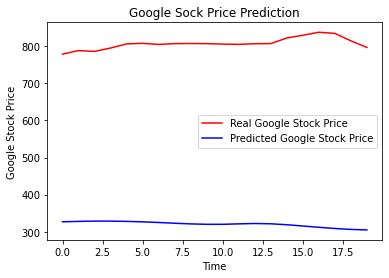

In [35]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_price_stock, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Sock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()